In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
bike_df = pd.read_csv('bike_train.csv')

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
bike_df.head(2)
bike_df.sample(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
3845,2011-09-11 05:00:00,3,0,0,1,24.60,28.030,83,8.9981,15,24,39
7824,2012-06-06 09:00:00,2,0,1,1,22.96,26.515,60,6.0032,35,268,303


In [9]:
bike_df.datetime.apply(pd.to_datetime)

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [10]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

In [11]:
bike_df.datetime.apply(lambda x:x.year)

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [12]:
bike_df['year'] = bike_df.datetime.apply(lambda x:x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x:x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x:x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x:x.hour)

In [13]:
bike_df.sample(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
5297,2011-12-14 19:00:00,4,0,1,2,14.76,18.180,62,7.0015,9,259,268,2011,12,14,19
10600,2012-12-08 02:00:00,4,0,0,2,14.76,17.425,93,8.9981,3,67,70,2012,12,8,2


In [14]:
bike_df.drop(columns=['datetime','casual','registered'],inplace=True)

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [29]:
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [31]:
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

In [33]:
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print(f'rmsle:{rmsle_val:.3f} rmse:{rmse_val:.3f} mae:{mae_val:.3f}')

In [22]:
np.log1p(23)

3.1780538303479458

In [23]:
np.expm1(3.1780538303479458)

23.000000000000004

In [27]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [34]:
y = bike_df['count']
X = bike_df.drop(columns=['count'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)
evaluate_regr(y_test,pred)

rmsle:1.165 rmse:140.900 mae:105.924


In [35]:
def get_top_error_data(y_test,pred,n_tops=5):
    result_df = pd.DataFrame(y_test.values,columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count']-result_df['predicted_count'])
    print(result_df.sort_values('diff',ascending=False)[:n_tops])

In [37]:
get_top_error_data(y_test,pred)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<AxesSubplot:>

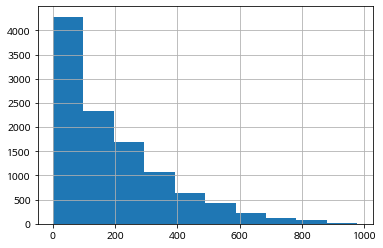

In [38]:
y.hist()

In [39]:
y_log = np.log1p(y)

<AxesSubplot:>

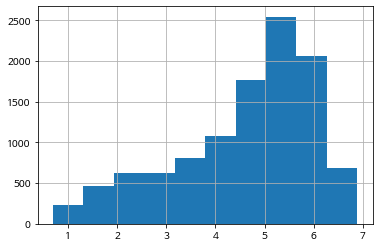

In [40]:
y_log.hist()

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y_log,test_size=0.3,random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
evaluate_regr(y_test_exp,pred_exp)

rmsle:1.017 rmse:162.594 mae:109.286


<AxesSubplot:>

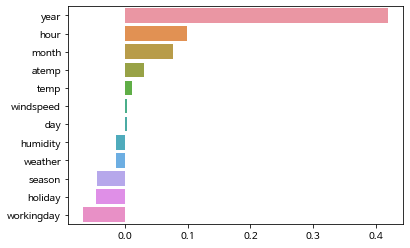

In [44]:
coef = pd.Series(lr_reg.coef_,index=X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values,y=coef_sort.index)

In [45]:
#년도가 영향력이 가장 큼

In [57]:
#원핫인코딩으로 저 오류를 줄여주자

In [46]:
X.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [54]:
X_features_ohe = pd.get_dummies(X,columns=['year','month','day','hour','holiday','workingday','season','weather'])
X.shape, X_features_ohe.shape

((10886, 12), (10886, 73))

In [55]:
X_features_ohe.head(2)

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0


In [56]:
X_train,X_test,y_train,y_test = train_test_split(X_features_ohe,
                                                 y_log,
                                                test_size=0.3,
                                                random_state=0)

In [62]:
def get_model_predict(model,X_train,X_test,y_train,y_test,is_expm1=False):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test,pred)

In [63]:
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

In [64]:
for model in [lr_reg,ridge_reg,lasso_reg]:
    get_model_predict(model,X_train,X_test,y_train,y_test,is_expm1=True)

### LinearRegression ###
rmsle:0.590 rmse:97.687 mae:63.381
### Ridge ###
rmsle:0.590 rmse:98.529 mae:63.893
### Lasso ###
rmsle:0.635 rmse:113.219 mae:72.803


<AxesSubplot:>

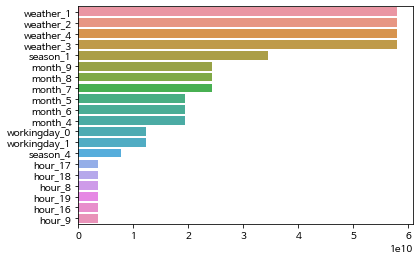

In [65]:
coef = pd.Series(lr_reg.coef_,index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values,y=coef_sort.index)

In [66]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [68]:
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
for model in [rf_reg,gbm_reg]:
    get_model_predict(model,X_train,X_test,y_train,y_test,is_expm1=True)

### RandomForestRegressor ###
rmsle:0.355 rmse:50.561 mae:31.232
### GradientBoostingRegressor ###
rmsle:0.330 rmse:53.342 mae:32.742


In [ ]:
타겟값의 정규분포형